In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
plt.rc('axes', axisbelow=True) 
cmap=plt.inferno
seed=42

In [6]:
df=pd.read_csv("heterogeneity_poroperm.csv")
df.head()
df.keys()

Index(['Depth (m)', 'Por (%)', 'Perm (mD)'], dtype='object')

In [8]:
df["PermPor"]=df["Perm (mD)"].values/df["Por (%)"].values
df.head()

,Depth (m),Por (%),Perm (mD),PermPor
0,0.25,9.974433,95.565148,9.581011
1,0.50,14.357128,224.836184,15.660248
2,0.75,14.961866,205.791051,13.754371
3,1.00,12.716367,216.282938,17.008233
4,1.25,14.059192,243.072993,17.289258


In [17]:
var_perm=np.var(df["Perm (mD)"].values,ddof=1)
print(f"sample variance of permeability: {np.round(var_perm,1)} mD^2")
print(f"sample variance of permeability: {np.round(var_perm,2)} mD^2")
print(f"sample variance of permeability: {np.round(var_perm,3)} mD^2")

sample variance of permeability: 6896.8 mD^2
sample variance of permeability: 6896.79 mD^2
sample variance of permeability: 6896.794 mD^2


In [23]:
coefvar_perm = stats.variation(df["Perm (mD)"].values,ddof=1)
print(f"Coefficient of variation of permeability: {np.round(coefvar_perm,3)}, unitless")

Coefficient of variation of permeability: 0.477, unitless


In [18]:
coefvar_permpor = stats.variation(df["PermPor"].values,ddof=1)
print(f"Coefficient of variation of permeability/porosity: {np.round(coefvar_permpor,3)} unitless")

Coefficient of variation of permeability/porosity: 0.332 unitless


In [22]:
# dykstra parsons
p16perm=np.percentile(df["Perm (mD)"].values,16)
p50perm=np.percentile(df["Perm (mD)"].values,50)
print(f"Permeability p16: {np.round(p16perm,3)}")
print(f"Permeability p50: {np.round(p50perm,3)}")
dp=(p50perm-p16perm)/p50perm
print(f"\nDykstra-Parsons coefficient: {np.round(dp,3)}, unitless")

Permeability p16: 100.561
Permeability p50: 164.81

Dykstra-Parsons coefficient: 0.39, unitless


In [26]:
mean_perm=np.average(df["Perm (mD)"].values)
mu=np.log(mean_perm**2/math.sqrt(var_perm+mean_perm**2))
sigma=math.sqrt(np.log(var_perm/(mean_perm**2)+1))
print(f"lognormal distribution parameters are mu: {np.round(mu,2)}, and sigma: {np.round(sigma,2)}")

lognormal distribution parameters are mu: 5.06, and sigma: 0.45


In [29]:
p16perm_lognorm=stats.lognorm.ppf(0.16,s=sigma,scale=math.exp(mu))
p50perm_lognorm=stats.lognorm.ppf(0.50,s=sigma,scale=math.exp(mu))
print(f"Permeability p16 from parametric lognormal distribution: {np.round(p16perm_lognorm,3)}")
print(f"Permeability p15 from parametric lognormal distribution: {np.round(p50perm_lognorm,3)}")

Permeability p16 from parametric lognormal distribution: 100.33
Permeability p15 from parametric lognormal distribution: 157.326


In [31]:
dp_lognorm=(p50perm_lognorm-p16perm_lognorm)/p50perm_lognorm
print(f"Dykstras-Parsons coefficient: {np.round(dp_lognorm,3)}, unitless")

Dykstras-Parsons coefficient: 0.362, unitless


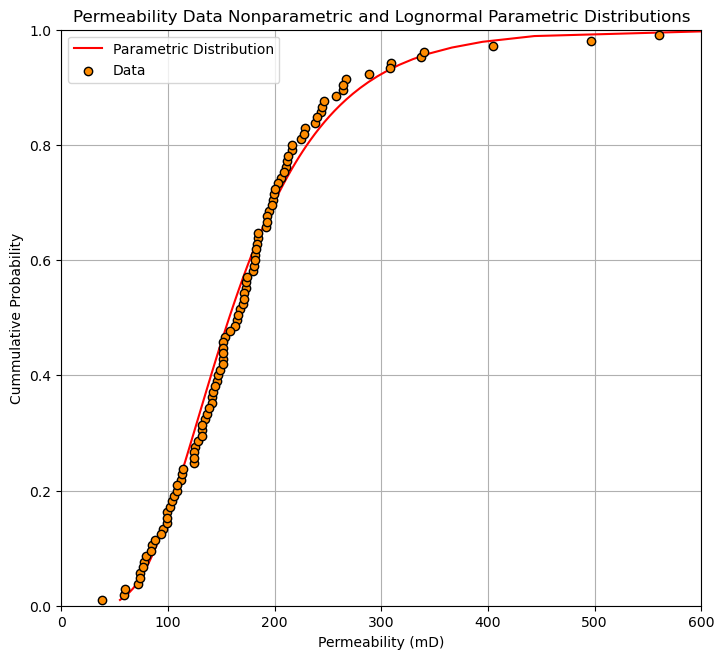

In [37]:
cumul_prob=np.linspace(0.01,0.999,100)
lognormal=stats.lognorm.ppf(cumul_prob,s=sigma,scale=math.exp(mu))
plt.plot(lognormal,cumul_prob,color='red',label="Parametric Distribution",zorder=1)
plt.xlabel("Permeability (mD)")
plt.ylabel("Cummulative Probability")
plt.title("Permeability Data Nonparametric and Lognormal Parametric Distributions")
plt.ylim([0,1])
plt.xlim([0,600])
plt.grid()
plt.scatter(df["Perm (mD)"].values,df["Perm (mD)"].rank()/(len(df)+1),color='darkorange',edgecolor='black',zorder=10,label='Data')
plt.legend(loc='upper left')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.3, hspace=0.4)
plt.show()